In [1]:

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Equation 9 from B. Aamaas et al. regional temperature change potentials


The temperature response at time H in latitude band m for an emission E of species i is 

$T_{i,r,m,s} (H ) = E_{i,r,s} × ARTP_{i,r,m,s} (H) $

In [2]:
iterables = [["s_subtropic", "tropics", "n_subtropic", "n_arctic", "global"], [10,20,50,100]]
data = np.linspace(1e-4, 3e-3, 20) #K/Tg BC

#for emissions from EAS
ARTP_df = pd.DataFrame(columns = ['BC'], index = pd.MultiIndex.from_product(iterables, names=["latitude", "time_horizon"]), data = data)

In [3]:
ARTP_df = pd.read_excel('aamaas_artp_tableS4.xlsx')
ARTP_df = ARTP_df.set_index(['Emis_season','Location','t_horizon'])

In [5]:
E = 50 #Tg over time

In [6]:
def delta_t(ARTP, E):#, t, rec_loc):
    #ARTP.xs([ssn, rec_loc, ])
    return(ARTP * E)

In [7]:
t_response = delta_t(ARTP_df, E)

In [12]:
t_response

BC_K_Tg
Emis_season Location     t_horizon                                                   
Winter      S_subtropics 10                                                     0.007
                         20                                                   0.00225
                         50                                                   0.00032
                         100                                                 0.000235
            Tropics      10                                                     0.039
                         20                                                     0.013
                         50                                                   0.00185
                         100                                                  0.00135
            N_midlat     10                                                     0.095
                         20                                                     0.031
                         50                                                    0.0044
                         100                                                   0.0032
            N_arctic     10                                                     0.155
                         20                                                     0.055
                         50                                                     0.008
                         100                                                   0.0055
            Global       10                                                     0.049
                         20                                                    0.0165
                         50                                                   0.00235
                         100                                                   0.0017
Summer      S_subtropics 10                                                    0.0145
                         20                                                   0.00485
                         50                                                    0.0007
                         100                                                   0.0005
            Tropics      10                                                    0.0375
                         20                                                    0.0125
                         50                                                   0.00175
                         100                                                   0.0013
            N_midlat     10                                                      0.08
                         20                                                    0.0265
                         50                                                   0.00375
                         100                                                  0.00275
            N_arctic     10                                                     0.115
                         20                                                     0.039
                         50                                                    0.0055
                         100                                                    0.004
            Global       10         9.0e_049.0e_049.0e_049.0e_049.0e_049.0e_049.0e...
                         20                                                     0.015
                         50                                                    0.0021
                         100                                                  0.00155

/home/software/anaconda3/2020.11/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2923: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


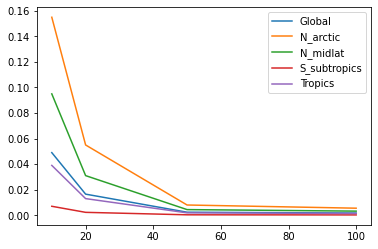

In [8]:
fig, ax = plt.subplots()
for reg in np.unique(t_response.reset_index()['Location']):
    ax.plot(t_response.xs(['Winter',reg]), label = reg)
    ax.legend()

In [ ]:
##### ADD IN CO2